# 第５章


In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ab_test_goal_df = pd.read_csv('./data/DL76333/R/section5-ab_test_goal.csv') # 表示されたバナーの表示回数情報
ab_test_imp_df = pd.read_csv('./data/DL76333/R/section5-ab_test_imp.csv') # 表示されたバナーのクリック階数情報

In [3]:
ab_test_goal_df.head()

,log_date,app_name,test_name,test_case,user_id,transaction_id
0,2013-10-01,game-01,sales_test,B,15021,25638
1,2013-10-01,game-01,sales_test,B,351,25704
2,2013-10-01,game-01,sales_test,B,8276,25739
3,2013-10-01,game-01,sales_test,B,1230,25742
4,2013-10-01,game-01,sales_test,B,17471,25743


In [4]:
ab_test_imp_df.head()

,log_date,app_name,test_name,test_case,user_id,transaction_id
0,2013-10-01,game-01,sales_test,B,36703,25622
1,2013-10-01,game-01,sales_test,A,44339,25623
2,2013-10-01,game-01,sales_test,B,32087,25624
3,2013-10-01,game-01,sales_test,B,10160,25625
4,2013-10-01,game-01,sales_test,B,46113,25626


In [5]:
len(ab_test_imp_df.index)

87924

In [6]:
 len(ab_test_goal_df)

8598

In [64]:
# 分析するためデータ加工
# バナーの表示回数情報にクリック情報をくっつける
# 表示されているけど、クリックされていない場合があると思うので、left
ab_test_merge = pd.merge(ab_test_imp_df, ab_test_goal_df, how='left', on=['transaction_id'], suffixes=('_imp' , '_goal'))

In [65]:
ab_test_merge.head()

,log_date_imp,app_name_imp,test_name_imp,test_case_imp,user_id_imp,transaction_id,log_date_goal,app_name_goal,test_name_goal,test_case_goal,user_id_goal
0,2013-10-01,game-01,sales_test,B,36703,25622,NaN,NaN,NaN,NaN,NaN
1,2013-10-01,game-01,sales_test,A,44339,25623,NaN,NaN,NaN,NaN,NaN
2,2013-10-01,game-01,sales_test,B,32087,25624,NaN,NaN,NaN,NaN,NaN
3,2013-10-01,game-01,sales_test,B,10160,25625,NaN,NaN,NaN,NaN,NaN
4,2013-10-01,game-01,sales_test,B,46113,25626,NaN,NaN,NaN,NaN,NaN


In [66]:
# 表示回数と比較して、数が減っていないか確認する
len(ab_test_merge) - len(ab_test_imp_df)

0

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


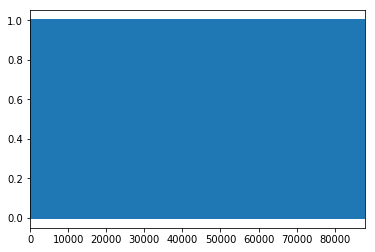

In [57]:
# todo: 列同士の差分の見方がわからん（何しようとしたか覚えていない）
(ab_test_merge['user_id_goal'] == ab_test_merge['user_id_imp']).plot()

In [17]:
# todo: 同じ列名で、差分がなければ重複とみなし統合？削除?したい
# どうやってやるかわからん

# 見つけた
# http://stackoverflow.com/questions/19125091/pandas-merge-how-to-avoid-duplicating-columns

diff_column = ab_test_goal_df.columns.difference(ab_test_imp_df)

In [21]:
ab_test_goal_df.columns

Index(['log_date', 'app_name', 'test_name', 'test_case', 'user_id',
       'transaction_id'],
      dtype='object')

In [22]:
ab_test_imp_df.columns

Index(['log_date', 'app_name', 'test_name', 'test_case', 'user_id',
       'transaction_id'],
      dtype='object')

In [18]:
diff_column

Index(['app_name', 'log_date', 'test_case', 'test_name', 'transaction_id',
       'user_id'],
      dtype='object')

差分がないっぽい

In [67]:
# クリックしたかどうかのフラグを作成する
ab_test_merge.head()

,log_date_imp,app_name_imp,test_name_imp,test_case_imp,user_id_imp,transaction_id,log_date_goal,app_name_goal,test_name_goal,test_case_goal,user_id_goal
0,2013-10-01,game-01,sales_test,B,36703,25622,NaN,NaN,NaN,NaN,NaN
1,2013-10-01,game-01,sales_test,A,44339,25623,NaN,NaN,NaN,NaN,NaN
2,2013-10-01,game-01,sales_test,B,32087,25624,NaN,NaN,NaN,NaN,NaN
3,2013-10-01,game-01,sales_test,B,10160,25625,NaN,NaN,NaN,NaN,NaN
4,2013-10-01,game-01,sales_test,B,46113,25626,NaN,NaN,NaN,NaN,NaN


In [68]:
# 欠損値。多いね
len(ab_test_merge) - ab_test_merge.count()

log_date_imp          0
app_name_imp          0
test_name_imp         0
test_case_imp         0
user_id_imp           0
transaction_id        0
log_date_goal     79326
app_name_goal     79326
test_name_goal    79326
test_case_goal    79326
user_id_goal      79326
dtype: int64

In [69]:
# クリックしていないところを'No'、したところを'Yes'を入れるカラムを作る
ab_test_merge['is_click'] = 'Yes'
ab_test_merge.loc[ab_test_merge['log_date_goal'].isnull() == True, 'is_click'] = 'No'

In [70]:
len(ab_test_merge) - ab_test_merge.count()

log_date_imp          0
app_name_imp          0
test_name_imp         0
test_case_imp         0
user_id_imp           0
transaction_id        0
log_date_goal     79326
app_name_goal     79326
test_name_goal    79326
test_case_goal    79326
user_id_goal      79326
is_click              0
dtype: int64

In [71]:
ab_test_merge.groupby('is_click')['log_date_imp'].count()

is_click
No     79326
Yes     8598
Name: log_date_imp, dtype: int64

In [73]:
# トランザクションID、表示された日付、テストケース、ユーザーID、is_clickだけを残す
ab_test_merge2 = ab_test_merge[['transaction_id', 'log_date_imp', 'test_case_imp', 'user_id_imp', 'is_click']].copy()

In [74]:
ab_test_merge2.head()

,transaction_id,log_date_imp,test_case_imp,user_id_imp,is_click
0,25622,2013-10-01,B,36703,No
1,25623,2013-10-01,A,44339,No
2,25624,2013-10-01,B,32087,No
3,25625,2013-10-01,B,10160,No
4,25626,2013-10-01,B,46113,No


# データ分析

In [87]:
# AとBのクリック率に統計的な差があったか把握する
pd.pivot_table(ab_test_merge2, index='test_case_imp', columns='is_click', values='transaction_id', aggfunc='mean')

is_click,No,Yes
test_case_imp,,
A,44158.449793,41584.082157
B,44006.957712,43714.940071


In [95]:
# 一気にやる方法が見えないので、値のところも作る
ab_test_merge2['is_click_int'] = np.where(ab_test_merge2['is_click'] == 'Yes', 1, 0)

In [97]:
ab_test_merge2.groupby('test_case_imp', as_index=False)['is_click_int'].mean()

,test_case_imp,is_click_int
0,A,0.080256
1,B,0.115460


In [114]:
ab_test_merge2[ab_test_merge2['is_click_int'] == 1].count()

transaction_id    8598
log_date_imp      8598
test_case_imp     8598
user_id_imp       8598
is_click          8598
is_click_int      8598
dtype: int64

Aは8%でBは12%ぐらいだとわかった

クリックしたか/していないかの仮説検定には、$x^2$検定を行います。

どんなしてやるの？

↓からコピペ  
http://qiita.com/ynakayama/items/6b89cb451a73ae7a8990

テストケースをクリックしたか／していないの仮説検定なので、test_case_impとis_click_intを使えばよい？

今回の場合の
* 帰無仮説って？
    * 表示回数の合計のうち、クリックされたのは8,598回か？
* 対立仮説って？
    * 表回数の合計のうち、クリックされたのは8598回じゃない
    
なんか色々情報をあさっているけど、違うっぽい

ABテストの話なので、ABテストのそれぞれは必ずランダムで表示しなければならない。なので、「広告をAとBと分けた結果、クリック率が変わったという結果がでた」ということを検定で判断したいという話。

っつーことは？ 

In [133]:
import scipy.stats

In [136]:
_cross = pd.crosstab(ab_test_merge2['test_case_imp'], ab_test_merge2['is_click'])

In [297]:
_cross

is_click,No,Yes
test_case_imp,,
A,40592,3542
B,38734,5056


In [140]:
# カイ二乗検定をおこなう
x2, p, dof, expected = scipy.stats.chi2_contingency(_cross)

print("カイ二乗値は %(x2)s" %locals() )
print("確率は %(p)s" %locals() )
print("自由度は %(dof)s" %locals() )
print( expected )

if p < 0.05:
    print("有意な差があります")
else:
    print("有意な差がありません")

カイ二乗値は 308.375052893
確率は 4.93413963379e-69
自由度は 1
[[ 39818.18029207   4315.81970793]
 [ 39507.81970793   4282.18029207]]
有意な差があります


>確率は 4.93413963379e-69

のe-69について  
$4.93413963379^{-69}$ってことらしいので、めちゃくちゃ小さいです


つーことで、「バナー広告をA,Bと分けたという原因により、クリック率が変わったという結果がでた」ということがわかったとか。（わからん）

In [154]:
ab_test_merge.columns

Index(['log_date_imp', 'app_name_imp', 'test_name_imp', 'test_case_imp',
       'user_id_imp', 'transaction_id', 'log_date_goal', 'app_name_goal',
       'test_name_goal', 'test_case_goal', 'user_id_goal', 'is_click'],
      dtype='object')

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


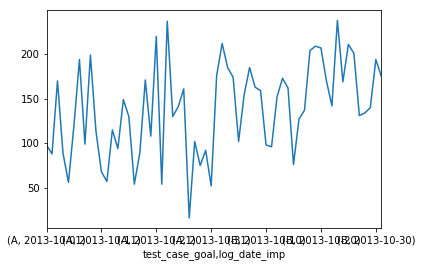

In [185]:
# 時系列なグラフを出すよー

_plot = ab_test_merge.loc[ab_test_merge['is_click'] == 'Yes', ['log_date_imp', 'test_case_goal', 'transaction_id']]
_plot.groupby(['test_case_goal', 'log_date_imp'])['log_date_imp'].count().plot()

なんか違う。。。AとBにそれぞれ折れ線がでてほしい

In [300]:
_plot.pivot_table(index='log_date_imp', columns='test_case_goal', values='transaction_id', aggfunc='count', fill_value=0).describe()

test_case_goal,A,B
count,31.000000,31.000000
mean,114.258065,163.096774
std,53.371008,38.766270
min,16.000000,76.000000
25%,81.500000,138.500000
50%,102.000000,169.000000
75%,145.000000,189.500000
max,237.000000,238.000000


/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


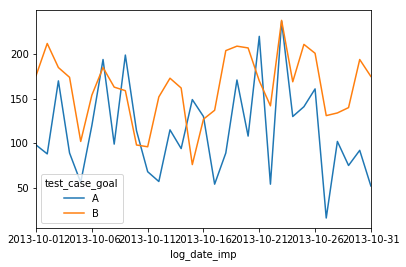

In [188]:
_plot.pivot_table(index='log_date_imp', columns='test_case_goal', values='transaction_id', aggfunc='count', fill_value=0).plot()

おー！できたっぽいけど、比率だったな。。。

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


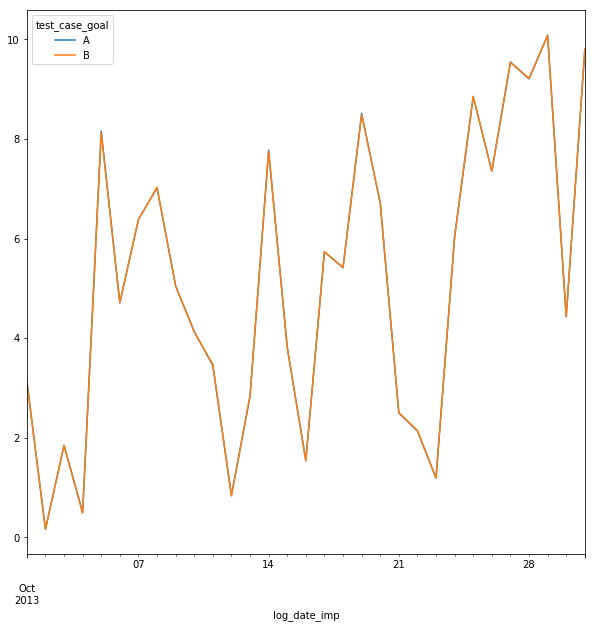

In [285]:
fig, ax = plt.subplots(figsize=(10, 10))
(_plot.pivot_table(index='log_date_imp', columns='test_case_goal', values='transaction_id', aggfunc='mean', fill_value=0) / len(ab_test_merge.loc[ab_test_merge['is_click'] == 'Yes', :])).plot(ax=ax)

んー？ 何故Aがない？

In [244]:
_plot['log_date_imp'] = pd.to_datetime(_plot['log_date_imp'])

In [304]:
_plot_count = _plot.pivot_table(index='log_date_imp', columns='test_case_goal', values='transaction_id', aggfunc='count', fill_value=0) 

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


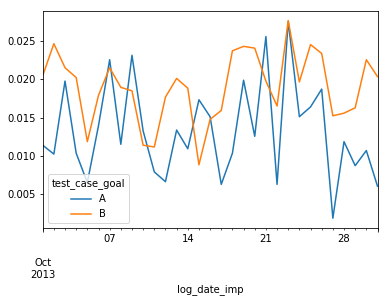

In [309]:
(_plot_count / len(ab_test_merge.loc[ab_test_merge['is_click'] == 'Yes', :])).plot()

In [310]:
_plot_count

test_case_goal,A,B
log_date_imp,,
2013-10-01,98,176
2013-10-02,88,212
2013-10-03,170,185
2013-10-04,89,174
2013-10-05,56,102
2013-10-06,120,154
2013-10-07,194,185
2013-10-08,99,163
2013-10-09,199,159


In [305]:
_plot_mean = _plot_count / len(ab_test_merge)

In [306]:
_plot_mean

test_case_goal,A,B
log_date_imp,,
2013-10-01,0.001115,0.002002
2013-10-02,0.001001,0.002411
2013-10-03,0.001933,0.002104
2013-10-04,0.001012,0.001979
2013-10-05,0.000637,0.001160
2013-10-06,0.001365,0.001752
2013-10-07,0.002206,0.002104
2013-10-08,0.001126,0.001854
2013-10-09,0.002263,0.001808


/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/ipykernel/__main__.py:8: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (p

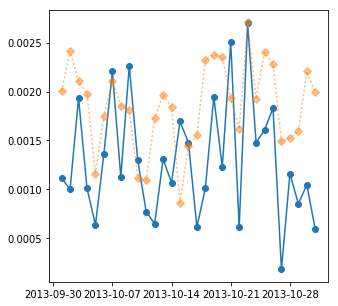

In [295]:
import matplotlib.dates as mdates

ax = plt.figure(figsize=(5, 5))

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.hold(True)
plt.plot(_plot_mean['A'].reset_index()['log_date_imp'], _plot_mean['A'].reset_index()['A'], marker='o')
plt.plot(_plot_mean['B'].reset_index()['log_date_imp'], _plot_mean['B'].reset_index()['B'], marker='D', linestyle='dotted', alpha=0.5)
plt.show()

なんか違うと思っていたけど、どうやら下記カラムを作らないといけないっぽい

* 日毎、テストケース毎に算出
    * imp
    * クリック数
    * cvr
* クリック数から平均を割った値（cvrのアベレージ）

In [314]:
ab_test_merge2.head()

,transaction_id,log_date_imp,test_case_imp,user_id_imp,is_click,is_click_int
0,25622,2013-10-01,B,36703,No,0
1,25623,2013-10-01,A,44339,No,0
2,25624,2013-10-01,B,32087,No,0
3,25625,2013-10-01,B,10160,No,0
4,25626,2013-10-01,B,46113,No,0


In [318]:
count_by_date_case = ab_test_merge2.groupby(['log_date_imp', 'test_case_imp'], as_index=False)['transaction_id'].count()

In [323]:
click_count_by_date_case = ab_test_merge2[ab_test_merge2['is_click'] == 'Yes'].groupby(['log_date_imp', 'test_case_imp'], as_index=False)['is_click'].count()

In [329]:
count_by_date_case = count_by_date_case.rename(columns={'transaction_id': 'imp_count'})
count_by_date_case.head()

,log_date_imp,test_case_imp,imp_count
0,2013-10-01,A,1358
1,2013-10-01,B,1391
2,2013-10-02,A,1370
3,2013-10-02,B,1333
4,2013-10-03,A,1213


In [330]:
click_count_by_date_case = click_count_by_date_case.rename(columns={'is_click': 'click_count'})
click_count_by_date_case.head()

,log_date_imp,test_case_imp,click_count
0,2013-10-01,A,98
1,2013-10-01,B,176
2,2013-10-02,A,88
3,2013-10-02,B,212
4,2013-10-03,A,170


In [331]:
len(count_by_date_case)

62

In [332]:
len(click_count_by_date_case)

62

In [335]:
click_count_by_date_case['imp_count'] = count_by_date_case['imp_count']
click_count_by_date_case['cvr'] = click_count_by_date_case['click_count'] / count_by_date_case['imp_count']

In [336]:
click_count_by_date_case.head()

,log_date_imp,test_case_imp,click_count,cvr,imp_count
0,2013-10-01,A,98,0.072165,1358
1,2013-10-01,B,176,0.126528,1391
2,2013-10-02,A,88,0.064234,1370
3,2013-10-02,B,212,0.159040,1333
4,2013-10-03,A,170,0.140148,1213


In [344]:
cvr_avg_a = sum(click_count_by_date_case[click_count_by_date_case['test_case_imp'] == 'A']['click_count']) / sum(click_count_by_date_case[click_count_by_date_case['test_case_imp'] == 'A']['imp_count'])
cvr_avg_b = sum(click_count_by_date_case[click_count_by_date_case['test_case_imp'] == 'B']['click_count']) / sum(click_count_by_date_case[click_count_by_date_case['test_case_imp'] == 'B']['imp_count'])

In [346]:
click_count_by_date_case['cvr_avr'] = pd.Series()
click_count_by_date_case.loc[click_count_by_date_case['test_case_imp'] == 'A', 'cvr_avr'] = cvr_avg_a
click_count_by_date_case.loc[click_count_by_date_case['test_case_imp'] == 'B', 'cvr_avr'] = cvr_avg_b

In [347]:
click_count_by_date_case.head()

,log_date_imp,test_case_imp,click_count,cvr,imp_count,cvr_avr
0,2013-10-01,A,98,0.072165,1358,0.080256
1,2013-10-01,B,176,0.126528,1391,0.115460
2,2013-10-02,A,88,0.064234,1370,0.080256
3,2013-10-02,B,212,0.159040,1333,0.115460
4,2013-10-03,A,170,0.140148,1213,0.080256


In [350]:
click_count_by_date_case[click_count_by_date_case['test_case_imp'] == 'A'].head()

,log_date_imp,test_case_imp,click_count,cvr,imp_count,cvr_avr
0,2013-10-01,A,98,0.072165,1358,0.080256
2,2013-10-02,A,88,0.064234,1370,0.080256
4,2013-10-03,A,170,0.140148,1213,0.080256
6,2013-10-04,A,89,0.058514,1521,0.080256
8,2013-10-05,A,56,0.035287,1587,0.080256


In [352]:
click_count_by_date_case['log_date_imp'] = pd.to_datetime(click_count_by_date_case['log_date_imp'])

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/ipykernel/__main__.py:11: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (

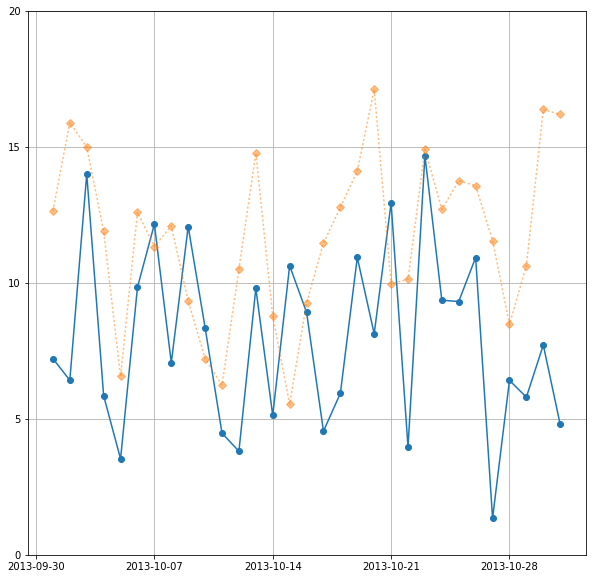

In [364]:
import matplotlib.dates as mdates

ax = plt.figure(figsize=(10, 10))

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

a = click_count_by_date_case[click_count_by_date_case['test_case_imp'] == 'A']
b = click_count_by_date_case[click_count_by_date_case['test_case_imp'] == 'B']

plt.hold(True)
plt.plot(a['log_date_imp'], a['cvr'] * 100, marker='o')
plt.plot(b['log_date_imp'], b['cvr'] * 100, marker='D', linestyle='dotted', alpha=0.5)
plt.yticks([0, 5, 10, 15, 20])
plt.grid()
plt.show()

やっとできた・・・orz
